# **Plot Results**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MPI

### Read Data

In [40]:
# Read sequential data
results_seq = pd.read_csv('results_UTW.csv', names=['N', 'T', 'mode', 'time'])
# Mean of result for each group of repetiton
results_seq = results_seq.groupby(['N'])['time'].mean().reset_index()


#Read MPI data
results_1 = pd.read_csv('results_UTWMPI_1.csv', names=['N', 'nodes', 'time'])
results_2 = pd.read_csv('results_UTWMPI_2.csv', names=['N', 'nodes', 'time'])
results_4 = pd.read_csv('results_UTWMPI_4.csv', names=['N', 'nodes', 'time'])
results_6 = pd.read_csv('results_UTWMPI_6.csv', names=['N', 'nodes', 'time'])
results_8 = pd.read_csv('results_UTWMPI_8.csv', names=['N', 'nodes', 'time'])

results_1 = results_1.groupby(['N', 'nodes'])['time'].mean().reset_index()
results_2 = results_2.groupby(['N', 'nodes'])['time'].mean().reset_index()
results_4 = results_4.groupby(['N', 'nodes'])['time'].mean().reset_index()
results_6 = results_6.groupby(['N', 'nodes'])['time'].mean().reset_index()
results_8 = results_8.groupby(['N', 'nodes'])['time'].mean().reset_index()

# Merge all MPI results ordered by matrix dimenion and number of nodes
results_MPI = pd.concat([results_1, results_2, results_4, results_6, results_8])
results_MPI = results_MPI.sort_values(by=['N', 'nodes']).reset_index(drop=True)

### Execution Time (Sequential)

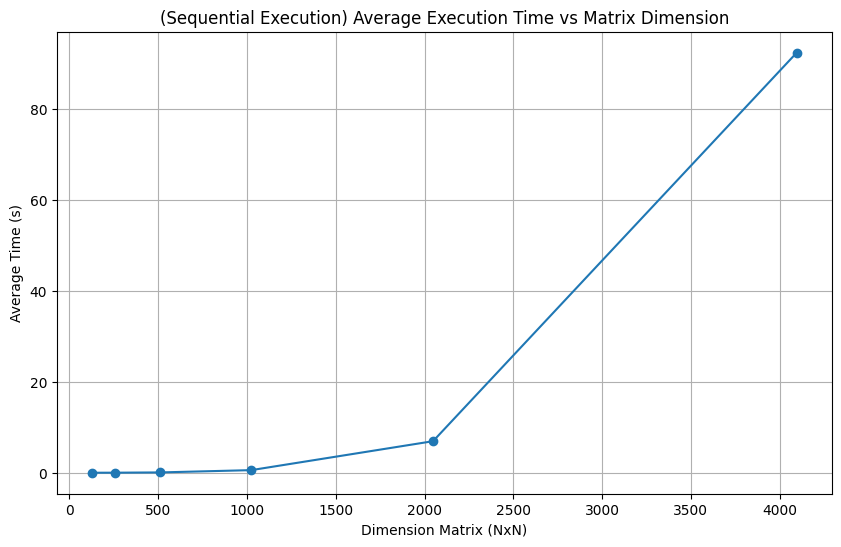

In [33]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_seq['N'], results_seq['time'], marker='o')
plt.xlabel('Dimension Matrix (NxN)')
plt.ylabel('Average Time (s)')
plt.title('(Sequential Execution) Average Execution Time vs Matrix Dimension')
plt.grid(True)
plt.show()

### Execution Time (Nodes)

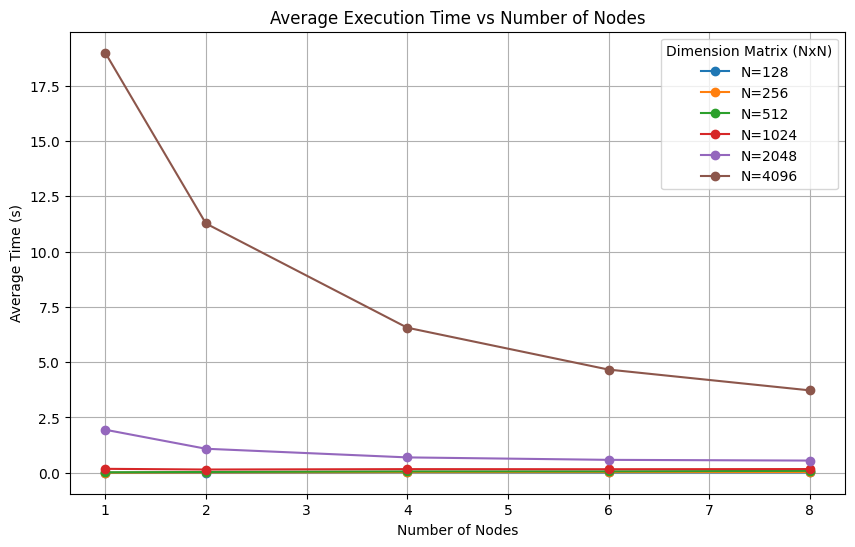

In [39]:
# Function for plotting executions data
def plot_time_dimension(data):
    plt.figure(figsize=(10, 6))

    for N in [128, 256, 512, 1024, 2048, 4096]:
        subset = data[data['N'] == N]
        plt.plot(subset['nodes'], subset['time'], marker='o', label=f'N={N}')

    plt.xlabel('Number of Nodes')
    plt.ylabel('Average Time (s)')
    plt.title('Average Execution Time vs Number of Nodes')
    plt.legend(title='Dimension Matrix (NxN)')
    plt.grid(True)
    plt.show()

plot_time_dimension(results_MPI)

### Speedup

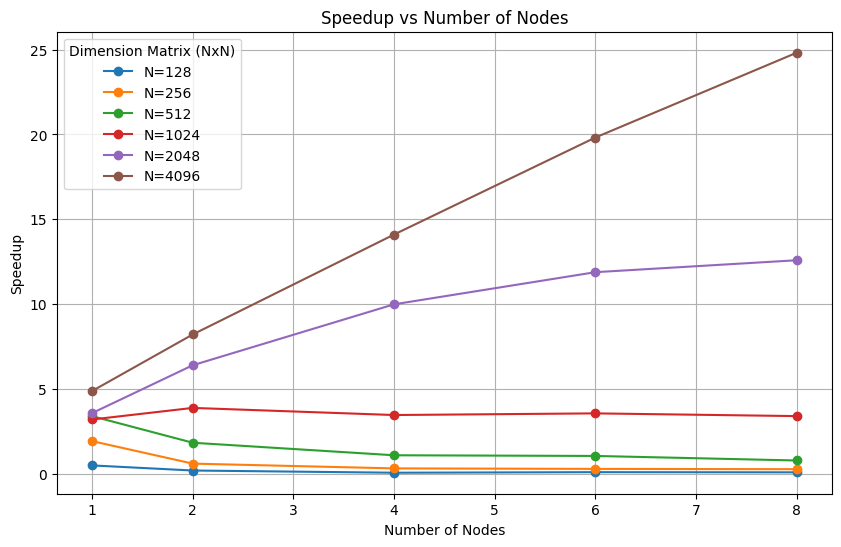

In [35]:
seq_times = {row['N']: row['time'] for _, row in results_seq.iterrows()}

# Plotting speedup vs number of nodes
def plot_speedup_thread(data):
    plt.figure(figsize=(10, 6))
    for N in [128, 256, 512, 1024, 2048, 4096]:
        subset = data[data['N'] == N]
        nodes_values = subset['nodes'].values
        speedup = seq_times[N] / subset['time'].values
        plt.plot(nodes_values, speedup, label=f'N={N}', marker='o')

    plt.xlabel('Number of Nodes')
    plt.ylabel('Speedup')
    plt.title('Speedup vs Number of Nodes')
    plt.legend(title='Dimension Matrix (NxN)')
    plt.grid(True)
    plt.show()

plot_speedup_thread(results_MPI)

### Efficiency

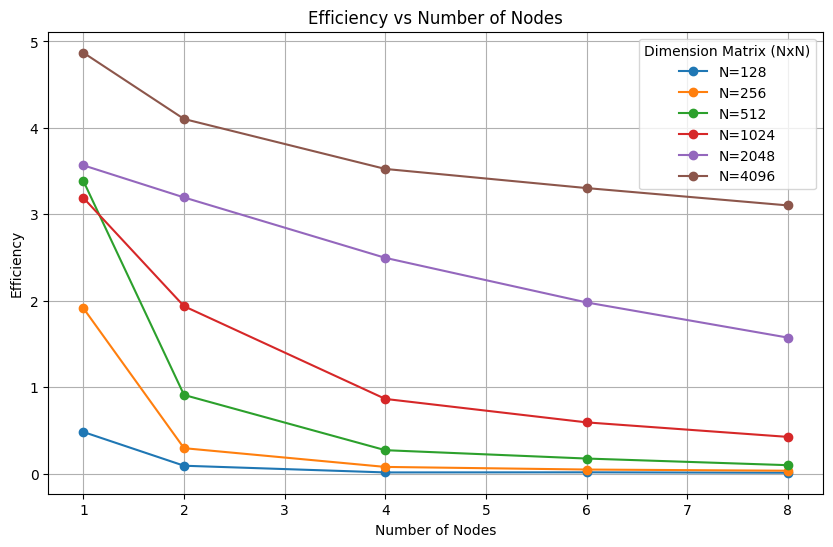

In [36]:
# Plotting efficiency vs number of nodes
def plot_efficiency_thread(data):
    plt.figure(figsize=(10, 6))
    for N in [128, 256, 512, 1024, 2048, 4096]:
        subset = data[data['N'] == N]
        nodes_values = subset['nodes'].values
        efficency = (seq_times[N] / subset['time'].values) / nodes_values
        plt.plot(nodes_values, efficency, label=f'N={N}', marker='o')

    plt.xlabel('Number of Nodes')
    plt.ylabel('Efficiency')
    plt.title('Efficiency vs Number of Nodes')
    plt.legend(title='Dimension Matrix (NxN)')
    plt.grid(True)
    plt.show()

plot_efficiency_thread(results_MPI)

### Strong Scalability

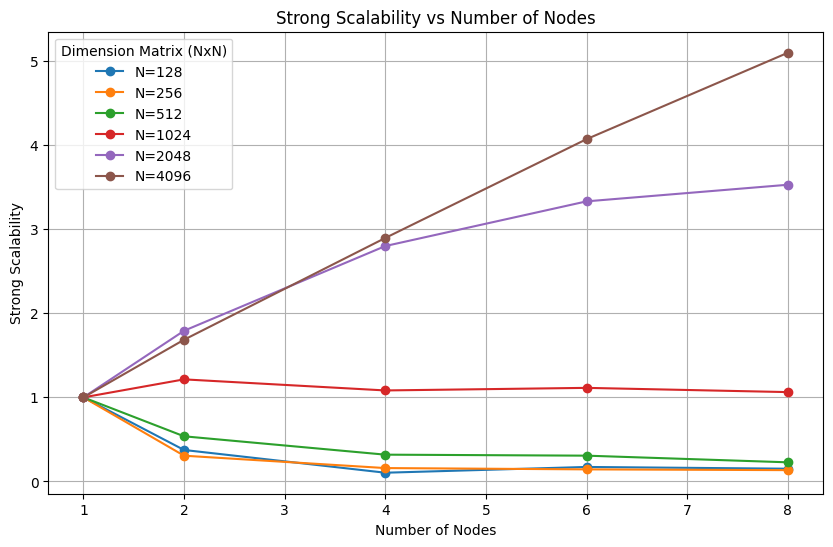

In [37]:
# Plotting strong scalability vs number of nodes
def plot_strong_scalability(data):
    plt.figure(figsize=(10, 6))
    for N in [128, 256, 512, 1024, 2048, 4096]:
        subset = data[data['N'] == N]
        nodes_values = subset['nodes'].unique()

        node1_time = subset[subset['nodes'] == 1]['time'].values[0]
        scalability = node1_time / subset['time'].values
        plt.plot(nodes_values, scalability, label=f'N={N}', marker='o')

    plt.xlabel('Number of Nodes')
    plt.ylabel('Strong Scalability')
    plt.title('Strong Scalability vs Number of Nodes')
    plt.legend(title='Dimension Matrix (NxN)')
    plt.grid(True)
    plt.show()

plot_strong_scalability(results_MPI)

### Weak Scalability



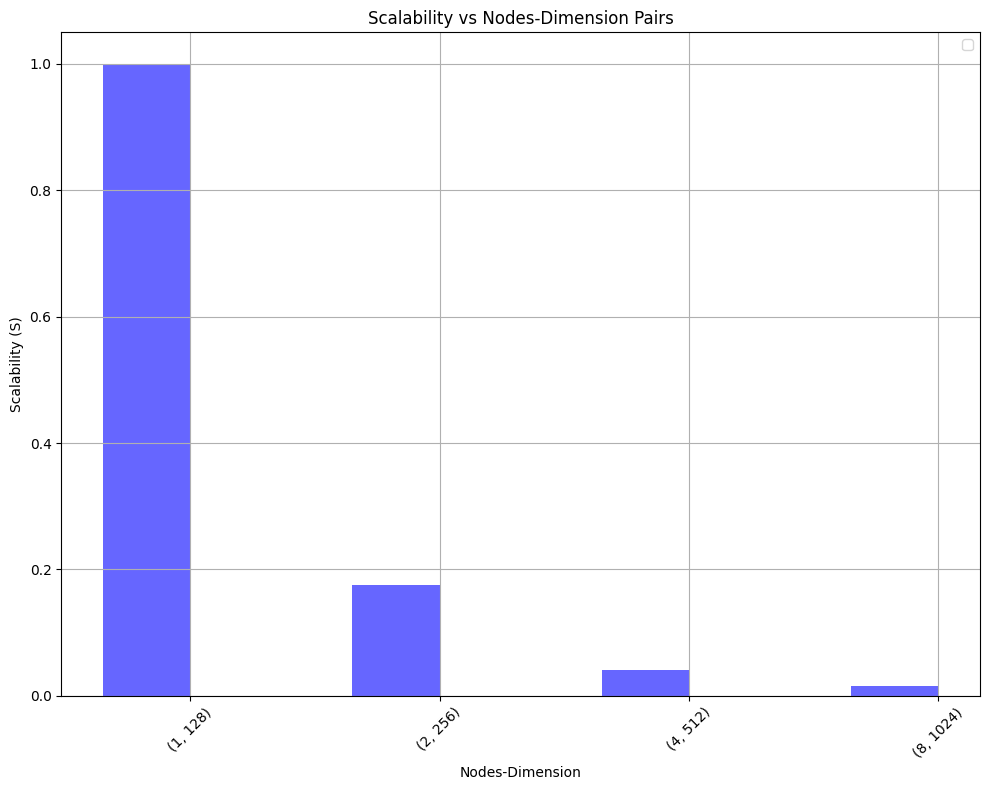

In [38]:
# Plotting weak scalability vs number of nodes

# Define thread values to test
node_values = [1, 2, 4, 8]
# Base matrix size
base_size = 128

# List to store scalability results
scalability_results = []

# Test each thread value
for node in node_values:
    N_scaled = base_size * node  # Scale matrix size proportionally to the number of threads
    result_MPI = results_MPI[(results_MPI['N'] == N_scaled) & (results_MPI['nodes'] == node)]

    if not result_MPI.empty:
        node1_time = results_MPI[(results_MPI['N'] == base_size) & (results_MPI['nodes'] == 1)]['time'].values[0]
        scalability = node1_time / result_MPI['time'].values[0]
        scalability_results.append((node, N_scaled, scalability))

# Extract node-dimension pairs and scalability values
pairs = [f'({node}, {N})' for node, N, S in scalability_results]
scalability = [S for node, N, S in scalability_results]

# Set up the plot
plt.figure(figsize=(10, 8))

# Define the width of each bar and the positions on the x-axis
bar_width = 0.35
index = np.arange(len(pairs))

# Plot bars for static scalability
plt.bar(index - bar_width/2, scalability, bar_width, color='blue', alpha=0.6)

plt.xlabel('Nodes-Dimension')
plt.ylabel('Scalability (S)')
plt.title('Scalability vs Nodes-Dimension Pairs')
plt.xticks(index, pairs, rotation=45)  # Set x-ticks to be the thread-dimension pairs
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()
